In [1]:
# Importação das bibliotecas
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import shapely
import matplotlib.pyplot as plt

In [2]:
gdf_solos = gpd.read_file('../dados/usodosolo1989_1990')

gdf_solos.head()

,SPRAREA,SPRPERIMET,SPRCLASSE,DESCLASSE,PERCLASSE,GRCLASSE,geometry
0,9.793875e+03,417.9497,Rios,rios,100%,Rios,"POLYGON ((362582.920 7495826.109, 362649.420 7..."
1,9.793875e+03,417.9497,Rios,rios,100%,Rios,"POLYGON ((462535.920 7486726.109, 462539.420 7..."
2,2.389359e+06,9005.5797,VS,vegetação secundária,100%,Vegetação secundária,"POLYGON ((379032.920 7478536.109, 379031.170 7..."
3,4.439048e+05,2688.2371,AC,agricultura cíclica,100%,Agricultura cíclica,"POLYGON ((276405.920 7430376.109, 276407.670 7..."
4,2.032058e+06,11162.6395,F,floresta,100%,Floresta,"POLYGON ((241972.920 7425266.109, 242039.420 7..."


<AxesSubplot: >

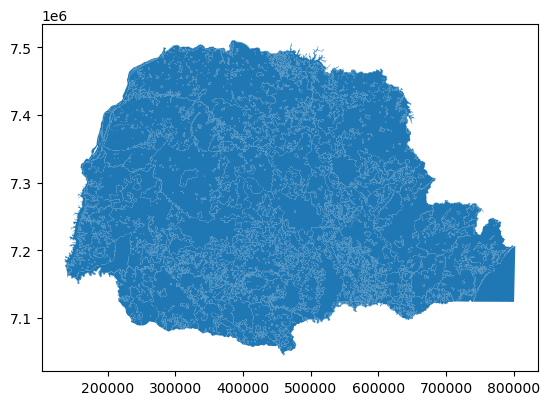

In [3]:
gdf_solos.plot()

In [4]:
df_places = gpd.read_file('../dados/hex8_data_geometry_curitiba3.geojson')


gdf = gpd.GeoDataFrame(
    gdf_solos)
gdf = gdf.set_crs(df_places.crs)
# gdf = gdf.to_crs(df_places.crs)


<AxesSubplot: >

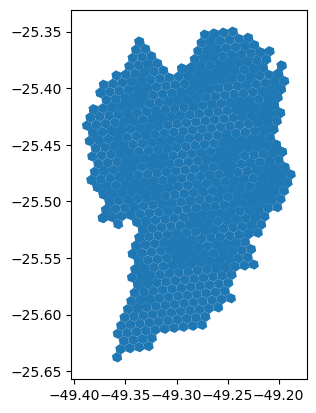

In [5]:
df_places.plot()

In [6]:
# df_merged = df_places.merge(gdf_solos, left_on=["lat", "long"], right_on=["lat", "long"])
gdf_solos = gdf_solos.set_crs("EPSG:22522")
# gdf_solos = gdf_solos.set_crs("EPSG:4326")
gdf_solos = gdf_solos.to_crs(df_places.crs)
df_merged = gpd.sjoin(df_places, gdf_solos, how="inner", predicate="intersects")
df_merged.head() 

,date,score,hex,NOME,geometry,index_right,SPRAREA,SPRPERIMET,SPRCLASSE,DESCLASSE,PERCLASSE,GRCLASSE
0,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana
1,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,"POLYGON ((-49.25623 -25.53586, -49.25208 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana
2,2020-04-01,100,88a831acebfffff,BAIRRO NOVO,"POLYGON ((-49.26539 -25.53675, -49.26124 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana
3,2020-07-12,100,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana
4,2020-04-25,99,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana


In [7]:
df_merged[:5]

,date,score,hex,NOME,geometry,index_right,SPRAREA,SPRPERIMET,SPRCLASSE,DESCLASSE,PERCLASSE,GRCLASSE
0,2020-05-18,100,88a831acc7fffff,BAIRRO NOVO,"POLYGON ((-49.27456 -25.53764, -49.27041 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana
1,2020-03-11,100,88a831ace1fffff,BAIRRO NOVO,"POLYGON ((-49.25623 -25.53586, -49.25208 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana
2,2020-04-01,100,88a831acebfffff,BAIRRO NOVO,"POLYGON ((-49.26539 -25.53675, -49.26124 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana
3,2020-07-12,100,88a831acc5fffff,BAIRRO NOVO,"POLYGON ((-49.26869 -25.54399, -49.26454 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana
4,2020-04-25,99,88a831acedfffff,BAIRRO NOVO,"POLYGON ((-49.25036 -25.54221, -49.24621 -25.5...",933,464387095.5,221396.1378,Area urbana,área urbana,100%,Área urbana


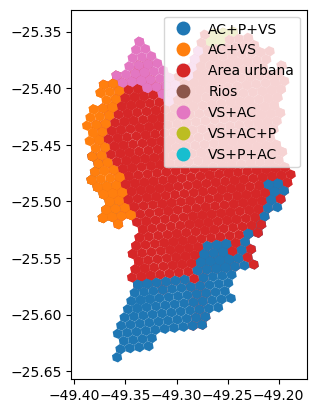

In [8]:
ax = df_merged.plot(column="SPRCLASSE", legend=True)